In [213]:
#BUSN 5760 Assignment-2
#Anjesh-Sahani
#ID= 4249264

#####################################################
#Importing the required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.api import het_breuschpagan
import seaborn as sns
from scipy import stats
#####################################################

In [214]:
#The United States Housing Dataset from Kaggle
df = pd.read_csv("C:/Users/anjes/Desktop/Anjesh/HW-2/Student_performance_data.csv")

###############################################################################
# Lets have overview of the data first
print(df.dtypes)
print("##############")
print(df.shape)


StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object
##############
(2392, 15)


In [ ]:
# Checking Data types and the size of data.
# There are 3 different types of variable int, float, object.
# 2392 rows and 15 columns

In [215]:
#Q.2 Displaying the top 5 rows of dataset
df.head(5)

#Upon checking the first 5 rows of data, we got every column information of data.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [216]:
#Q.3 Use Pandas to calculate summary statistics
df.describe()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [14]:
#The average GPA of student is around 1.90 and the highest GP is 4.0
#Those who study weekly 9.771992 hours will get 1.9 GPA and someone who study 19.978094 hours are likely to get 4 GPA
#Absence is also one factor of getting higher GPA.
#While involving in volunteering makes tough to achive high score

In [178]:
#Justo to chech if we have any NA's value or duplicate rows.
df.isna().sum()

#########################################################
df.dropna(inplace =True)
df.drop_duplicates()

#I am using this function just to remove NA's and any duplicates rows present in dataset to avoid in-consistency.

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


C:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

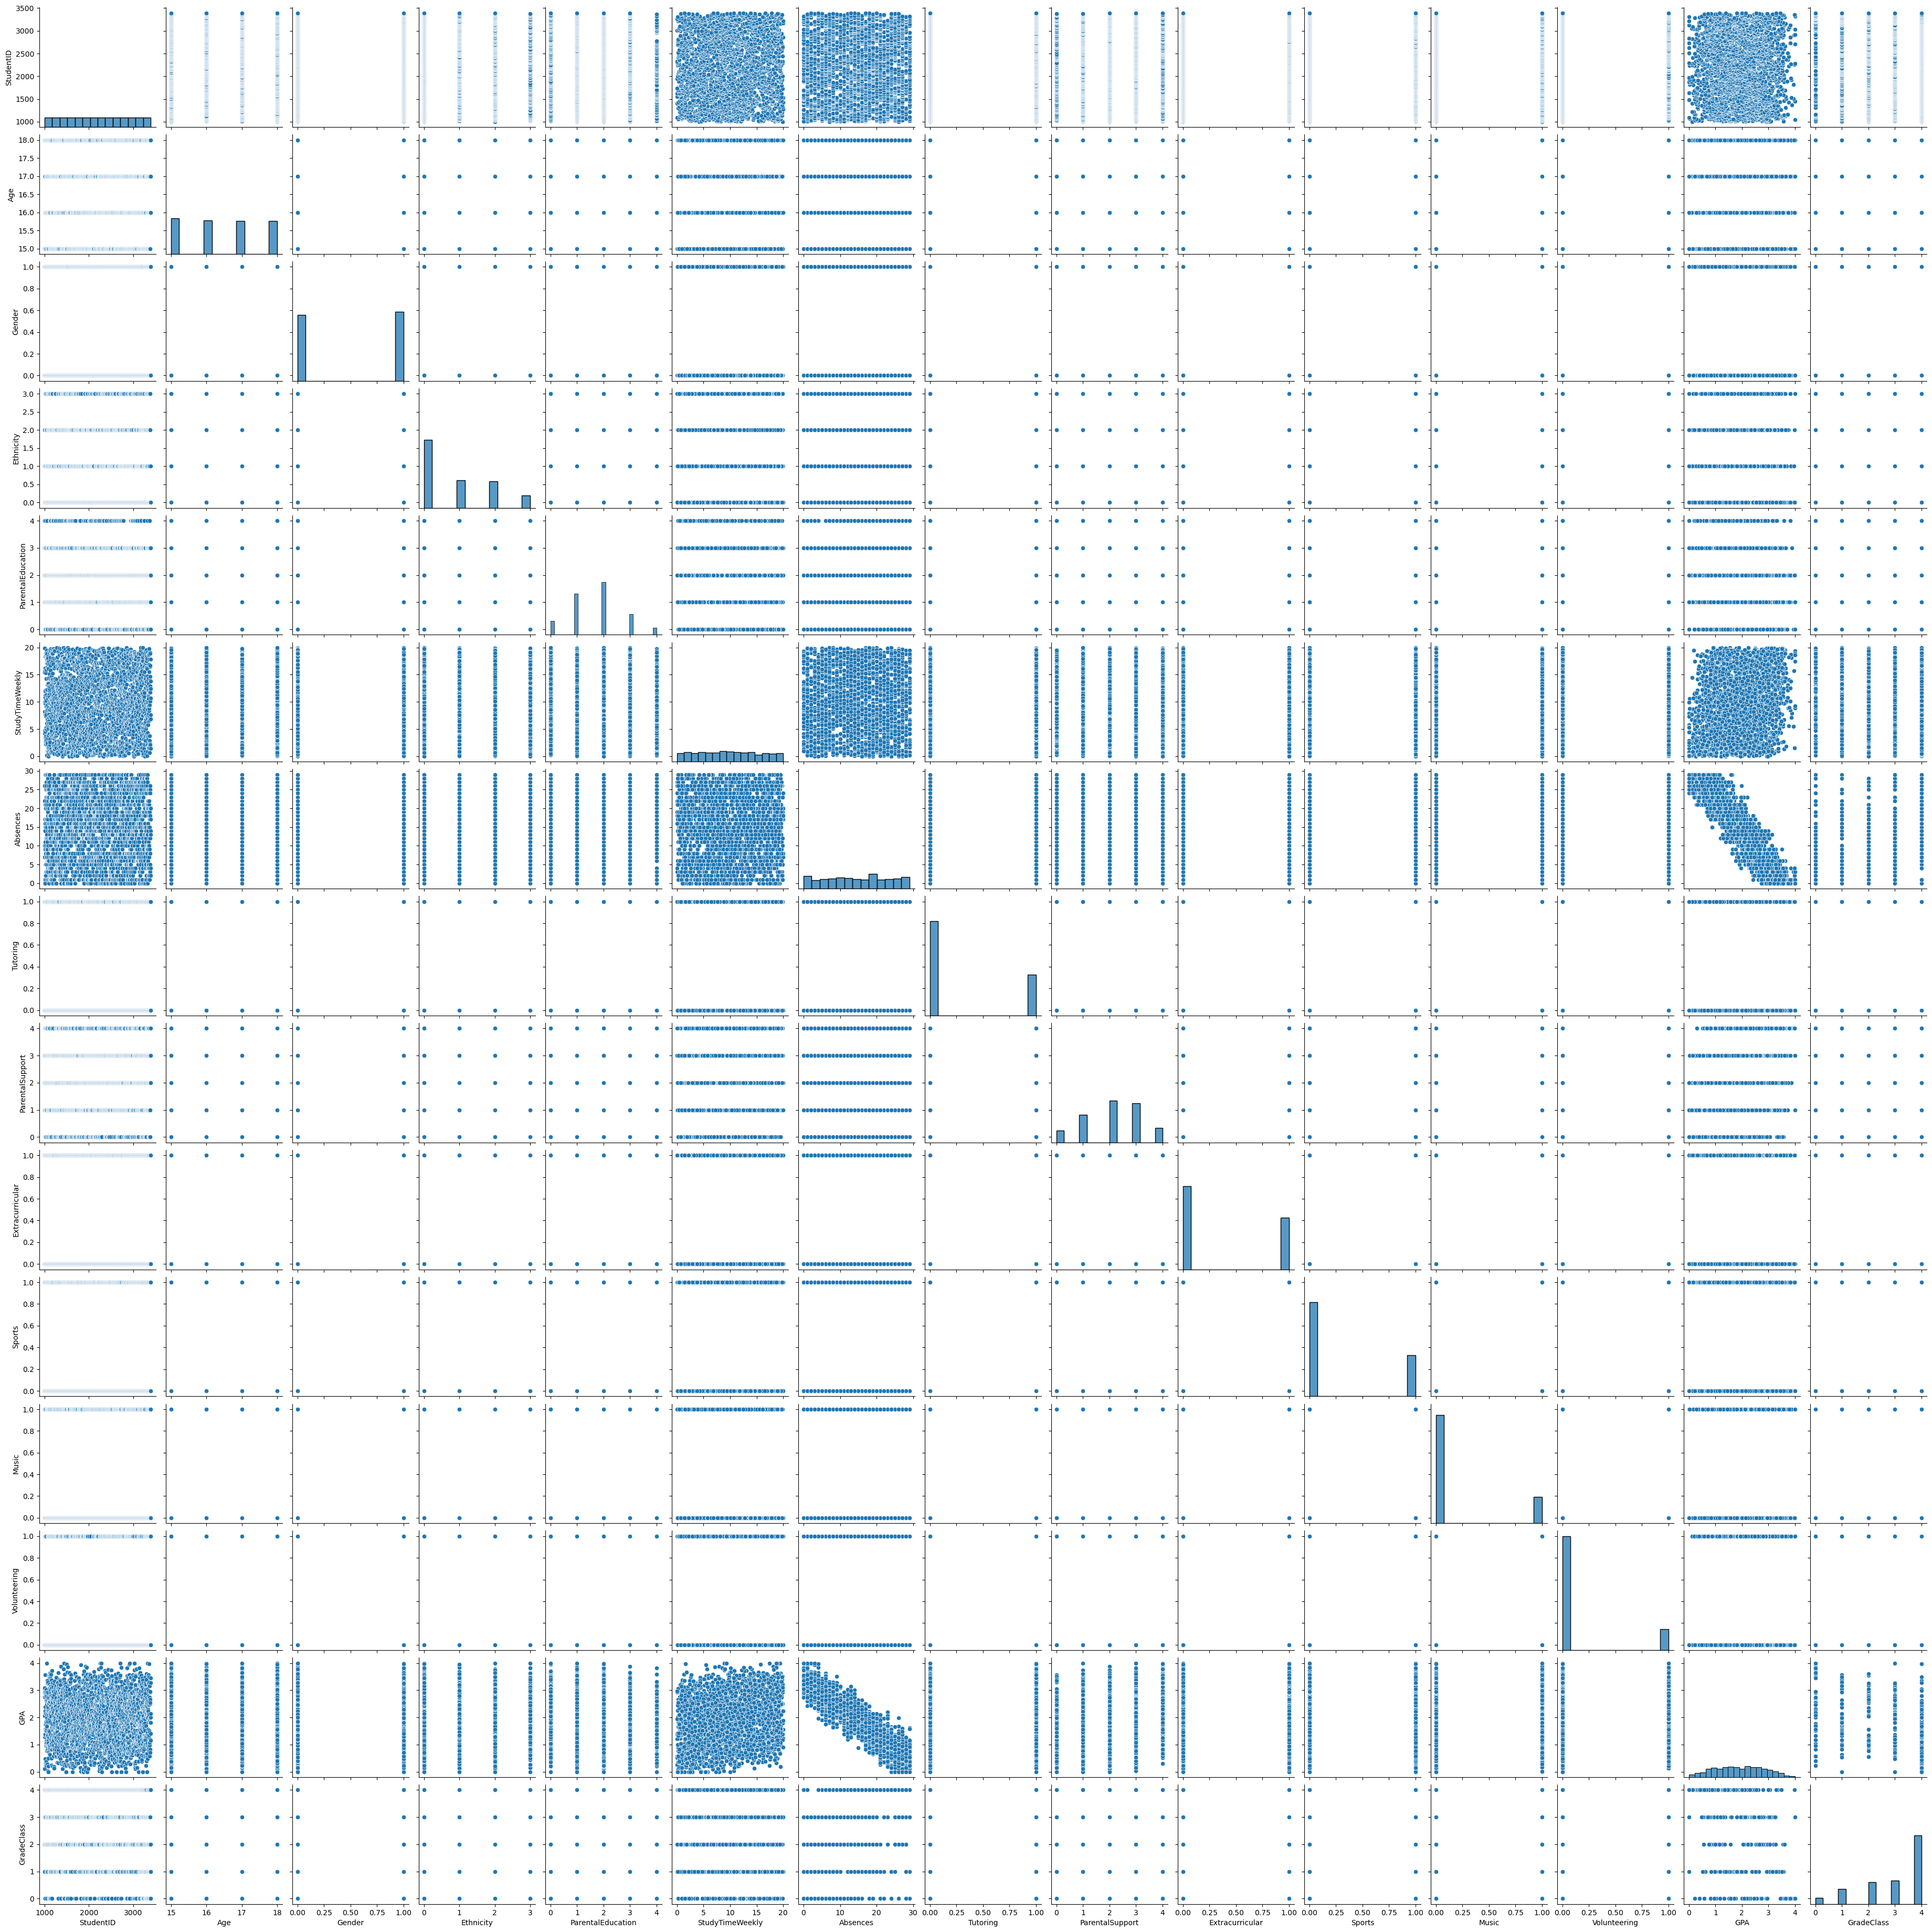

In [217]:
#Q.4 Use Seaborn’s pairplot to create the big graphic containing all the different variables plotted against each other.
sns.pairplot(df)

In [218]:
#Create a list of your independent variables and use a loop to create a plot of each one against your dependent variable.
df = pd.get_dummies(df, drop_first=True, dtype=int)

#Or
dependent_variable = "GPA"
independent_var = df.drop("GPA",axis=1).columns
independent_variable1 = pd.get_dummies(independent_var, drop_first=True, dtype=int).columns

#This function drop dependent variable that is price from the data set, and then we can have independent variable list

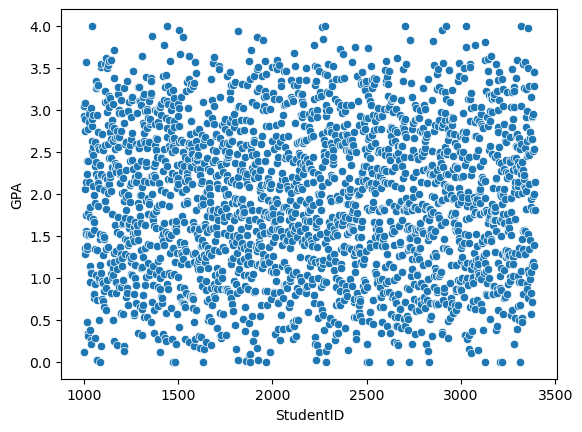

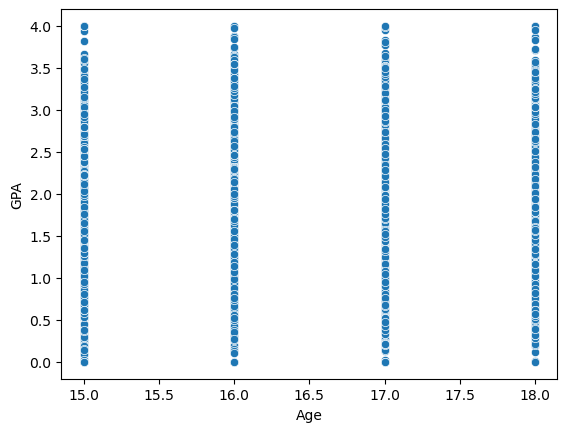

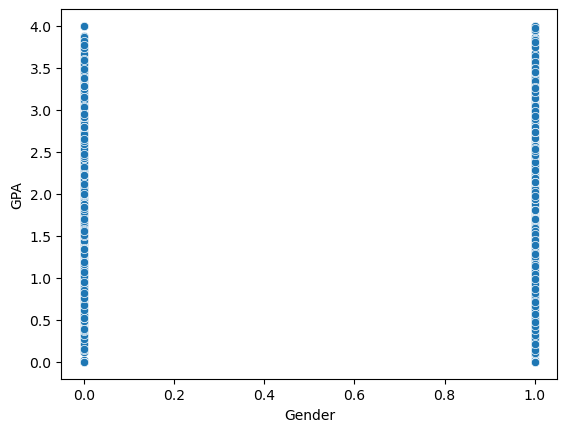

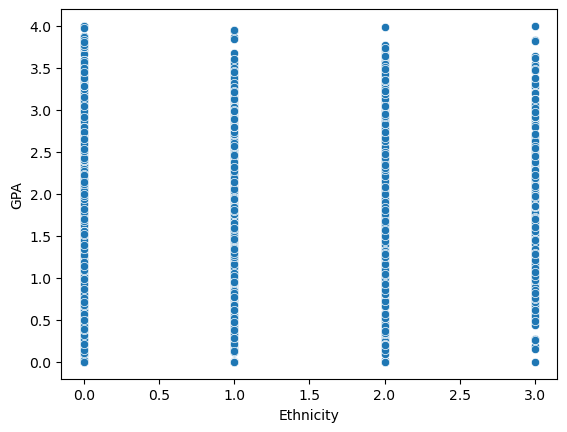

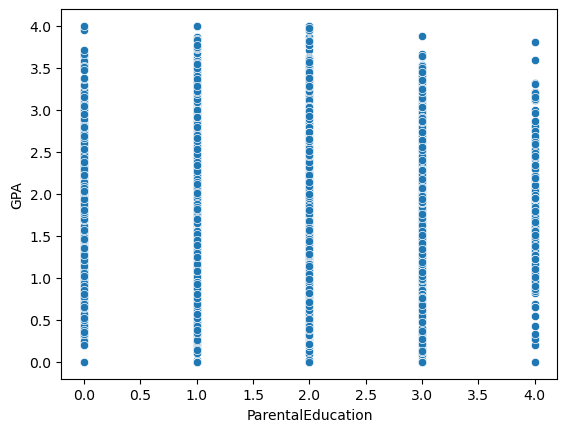

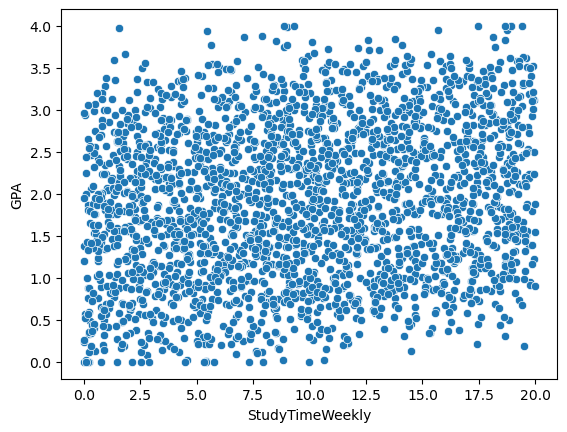

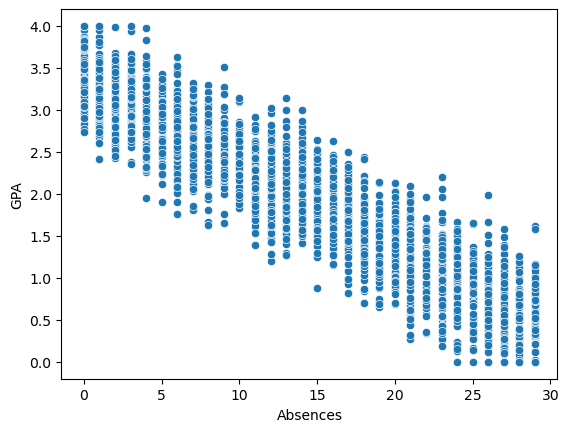

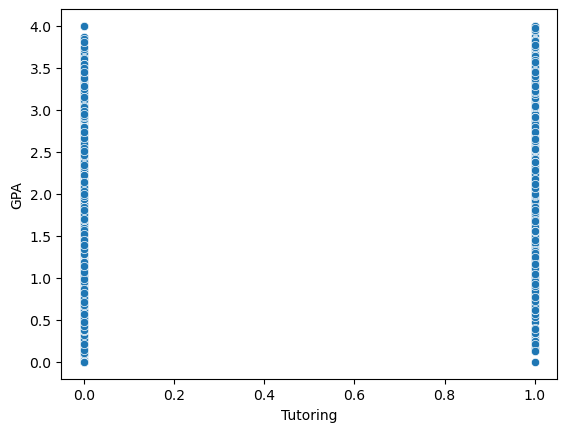

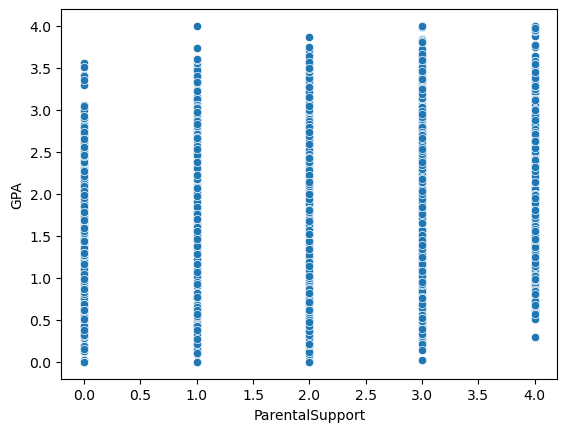

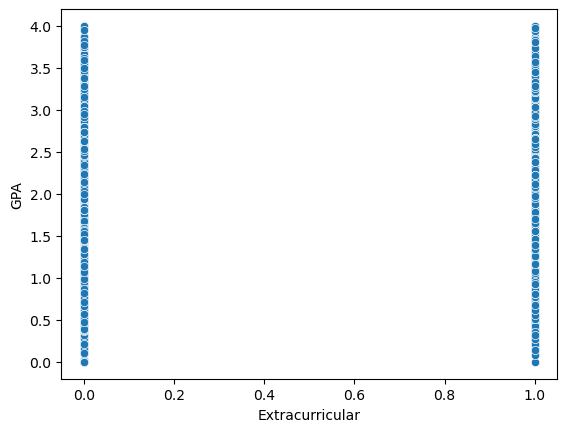

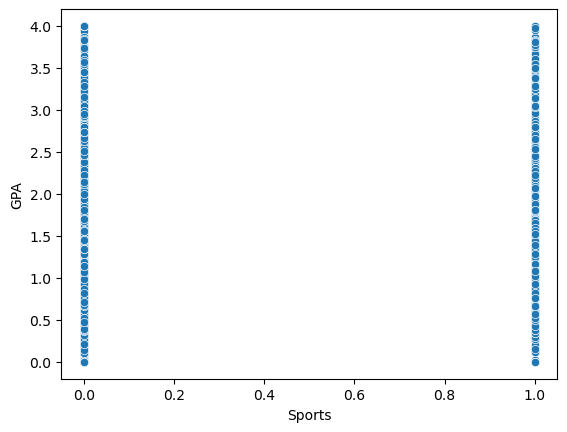

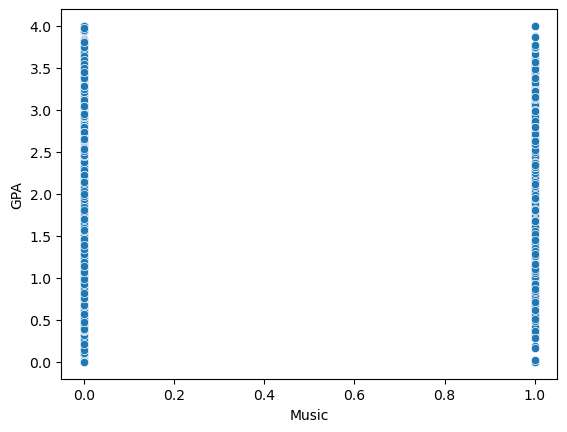

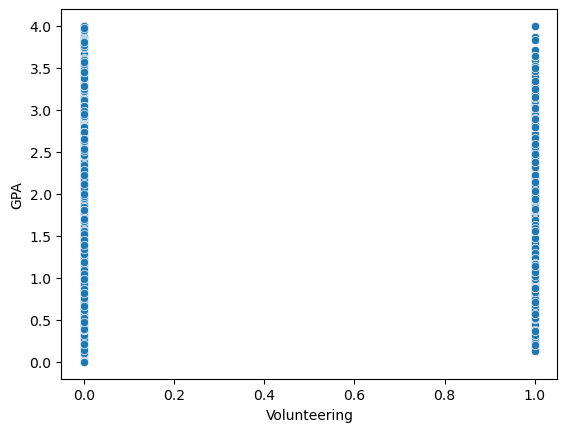

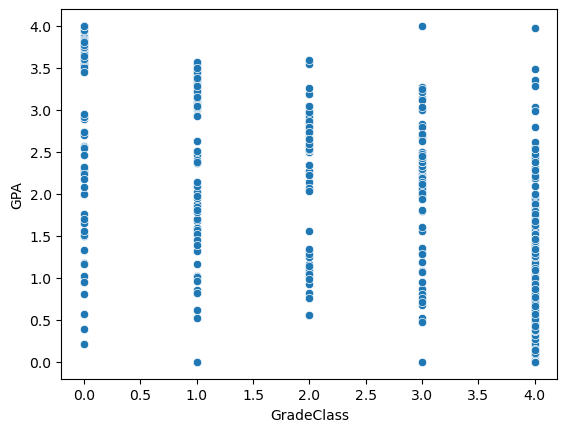

In [219]:
#PLotting graph containing all the different variables plotted against each other.
for var in independent_var:
    sns.scatterplot(y="GPA", x=var, data=df)
    plt.show()


In [ ]:
#Scatter plot shows age, ethnicity, gender does not influence gpa score
#Parental education influence the gpa, more actively parent involve helping child more gpa will score.
#More hour student study the more gpa will score.
#Absences shows perfectly negative corelation between gpa and class absent, if student miss class frequenty the lesser result one will get.
#Parental Support also helps in achiving higer gpa
#Class Gpa and Equivalent Gpa may influence overall.

In [220]:
#Q.6 Create three different linear regression models using different subsets of independent variables.  Print the regression result for each.
model1 =sm.OLS.from_formula("GPA ~ Age + Gender + ParentalEducation + Music", df)
result1 = model1.fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.249
Date:                Mon, 29 Jul 2024   Prob (F-statistic):            0.00198
Time:                        17:53:13   Log-Likelihood:                -3173.0
No. Observations:                2392   AIC:                             6356.
Df Residuals:                    2387   BIC:                             6385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.9185      0.276      6.961      0.000       1.378       2.459
Age                   0.0017      0.017      0.104      0.917      -0.031       0.034
Gender               -0.0251      0.037     -0.672      0.501      -0.098       0.048
ParentalEducation    -0.0355      0.019     -1.899      0.058      -0.072       0.001
Music                 0.1725      0.047      3.672      0.000       0.080       0.265
==============================================================================
Omnibus:                      279.685   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.731
Skew:                           0.016   Prob(JB):                     3.59e-17
Kurtosis:                       2.129   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model1 liner model result shows that R-squared:0.007 which is very small percentage of data explained by this model
#ParentalEducation and Music variable is stastically significance considering alpha = 0.05
#low p-value indicates that the model significantly explains the variation in GPA.
#Age and Gender does not explained the variation in GPA efficiently

In [244]:
#Q.6
model2 =sm.OLS.from_formula("GPA ~ Tutoring + Extracurricular + ParentalEducation + StudyTimeWeekly + Absences ", df)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     4587.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:08:32   Log-Likelihood:                -356.47
No. Observations:                2392   AIC:                             724.9
Df Residuals:                    2386   BIC:                             759.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9080      0.019    153.294      0.000       2.871       2.945
Tutoring              0.2492      0.013     19.876      0.000       0.225       0.274
Extracurricular       0.1845      0.012     15.599      0.000       0.161       0.208
ParentalEducation     0.0011      0.006      0.192      0.848      -0.010       0.012
StudyTimeWeekly       0.0302      0.001     29.652      0.000       0.028       0.032
Absences             -0.0993      0.001   -146.151      0.000      -0.101      -0.098
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                2.063
Skew:                          -0.032   Prob(JB):                        0.357
Kurtosis:                       2.871   Cond. No.                         66.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#This value 0.90 indicates the 90% of the proportion of variance in GPA that can be explained by the independent variables in the model. 
#In simpler terms, 90.6% of 
#low p-value indicates that the model significantly explains the variation in GPA.
#The coefficient for StudyTimeWeekly is 0.0302 is positive and highly statistically significant
#The coefficient for Absences -0.0996 is negative and highly statistically significant

In [222]:
#Q.6
model3 =sm.OLS.from_formula("GPA ~ Age + Gender + ParentalEducation + StudyTimeWeekly + Absences + Tutoring + ParentalSupport +Extracurricular + Sports + Volunteering", df)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4544.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:10:49   Log-Likelihood:                 406.51
No. Observations:                2392   AIC:                            -791.0
Df Residuals:                    2381   BIC:                            -727.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6287      0.063     41.405      0.000       2.504       2.753
Age                  -0.0060      0.004     -1.607      0.108      -0.013       0.001
Gender                0.0158      0.008      1.880      0.060      -0.001       0.032
ParentalEducation     0.0041      0.004      0.988      0.323      -0.004       0.012
StudyTimeWeekly       0.0290      0.001     39.091      0.000       0.028       0.030
Absences             -0.0999      0.000   -201.619      0.000      -0.101      -0.099
Tutoring              0.2488      0.009     27.221      0.000       0.231       0.267
ParentalSupport       0.1533      0.004     41.074      0.000       0.146       0.161
Extracurricular       0.1890      0.009     21.945      0.000       0.172       0.206
Sports                0.1915      0.009     20.999      0.000       0.174       0.209
Volunteering         -0.0059      0.012     -0.511      0.609      -0.028       0.017
==============================================================================
Omnibus:                        4.342   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.199
Skew:                          -0.073   Prob(JB):                        0.123
Kurtosis:                       2.855   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
#This value 0.95 indicates the 95% proportion of variance in GPA that can be explained by the independent variables in the model. 
#In simpler terms, 95% of 
#low p-value indicates that the model significantly explains the variation in GPA.
#The coefficient for StudyTimeWeekly is 0.0290 is positive and highly statistically significant
#The coefficient for Absences -0.0999 is negative and highly statistically significant
# Tutoring, ParentalSupport, Extracurricular and Sports also positive and highly statistically significant

#This means model3 is the best fit model among all three model,
#95% proportion of variance in GPA that can be explained by the independent variables in the model3. 

In [199]:
#Q.7 Comparing all three models 
#Compare your models using the four different selection statistics we discussed. (R^2, AIC…) and select one as your best model.
models = ['model','model2','model3']
r_squared = [result1.rsquared, result2.rsquared, result3.rsquared]
adj_r_squared = [result1.rsquared_adj, result2.rsquared_adj, result3.rsquared_adj]
aic = [result1.aic, result2.aic, result3.aic]
bic = [result1.bic, result2.bic, result3.bic]

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared          AIC          BIC
0   model   0.007069            0.005405  6356.077903  6384.977329
1  model2   0.880531            0.880281  1292.762753  1327.442064
2  model3   0.950214            0.950005  -791.014769  -727.436032


In [ ]:
# From the above result only model-3 explain 95% proportion of variance in GPA that can be explained by the independent variables in the model3. 
#Model 3 is the best fit model to do analysis because it has negative AIC,BIC(Lower is best) and Statically significance with Higher Adjusted R-squared.
# That means model-3 fullfil the criteria of best-fitted model

In [224]:
#Q.8 
#Calculate the variance inflation factor for your independent variables to check for multicollinearity.
#Print the result and tell me if you think multicollinearity was detected.
#If it was, make the appropriate modifications to your model before proceeding.
vif = pd.DataFrame()
vif["features"] = independent_variable.columns
vif["VIF Factor"] = [variance_inflation_factor(independent_variable, i) for i in range(independent_variable.shape[1])]

print(vif)

         features  VIF Factor
0        bedrooms         1.0
1            city         1.0
2       condition         1.0
3         country         1.0
4            date         1.0
5          floors         1.0
6      sqft_above         1.0
7   sqft_basement         1.0
8     sqft_living         1.0
9        sqft_lot         1.0
10       statezip         1.0
11         street         1.0
12           view         1.0
13     waterfront         1.0
14       yr_built         1.0
15   yr_renovated         1.0


In [ ]:
#The VIF values is 1 that means there is no multi-colinearity

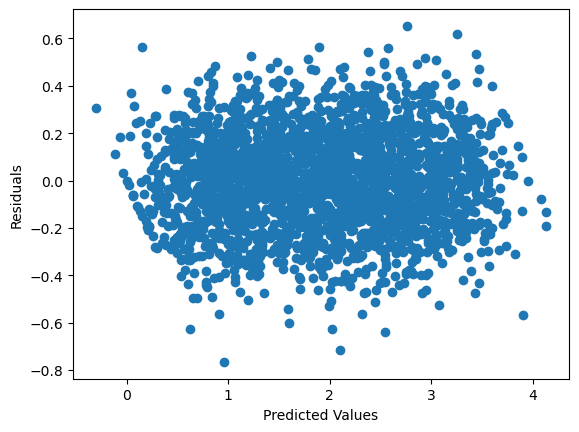

In [225]:
#Q.9
#Using your best model, create a variable containing the predicted values of Y, called y-hat, and a variable containing the residuals called e.
#Make a scatterplot with the residuals on the y-axis and the predicted values on the x-axis.

y_hat = result3.fittedvalues
e = result3.resid
plt.scatter(y_hat, e)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#The residuals exhibit a relatively wide spread across the predicted values.
#The residuals appear to be centered reasonably close to the zero line
#Overall, the residuals plot suggests that the model has a reasonable fit to the data. 

C:\Users\anjes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


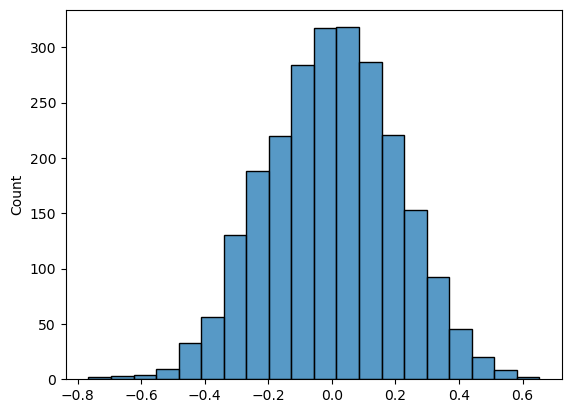

In [227]:
#Q.10
#Plot a histogram of your residuals to check that they’re normally distributed.  Tell me if you think they are normally distributed or not.

sns.histplot(e, bins=20)
plt.show()

In [ ]:
#The data is distributted normally, most of the data in the middle, however it seems this data left skewed.
#The residual spread distribution pattern is normal 
#the histogram suggests that the data is approximately normally distributed with a center around 0 and a moderate spread. 
#This distribution pattern can be valuable in statistical analysis and modeling

In [240]:
#Q.11 
#Use a statistical test to test for heteroskedasticity (BP test).  Tell me if you think heteroskedasticity is present or not.

bp_test = het_breuschpagan(e, result3.model.exog)
print("\nbp_test:")
print(bp_test)


alpha = 0.05
if bp_test[2] < alpha:
    print("There is significant heteroskedasticity.")
else:
    print("There is not enough heteroskedasticity.")


bp_test:
(11.757606770453457, 0.3016065330553878, 1.1761349096242981, 0.30199085791521063)
There is not enough heteroskedasticity.


In [ ]:
# There is no heteroskedasticity significance, all the value is grater than the standard alpha value 0.05.

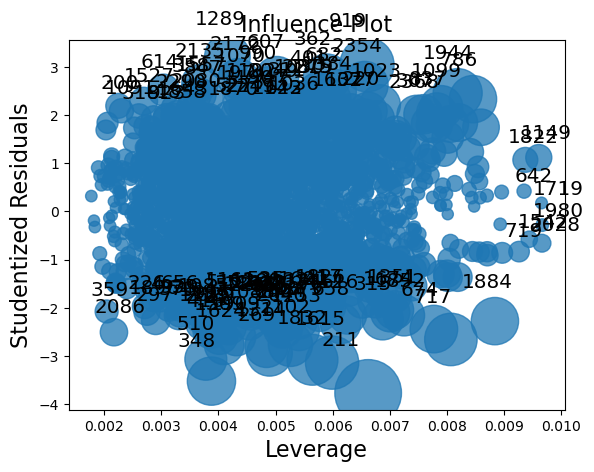

In [232]:
#Q.12 
#Create an influence plot to check for outliers.  Display the plot and tell me if you think any of your data points are problematic.

influence = result3.get_influence()
sm.graphics.influence_plot(result3)
plt.show()


In [ ]:
#There are no points with extremely large studentized residuals
#A few points on the right side of the plot have high leverage, indicating they might have some influence on the model.
#The influence plot suggests that the data points have a moderate impact on the regression model
#While there are a few points with high leverage, 
#their overall influence seems manageable

C:\Users\anjes\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\anjes\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\anjes\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

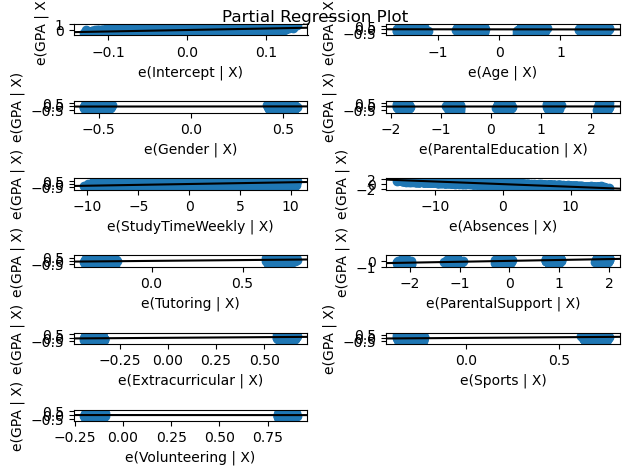

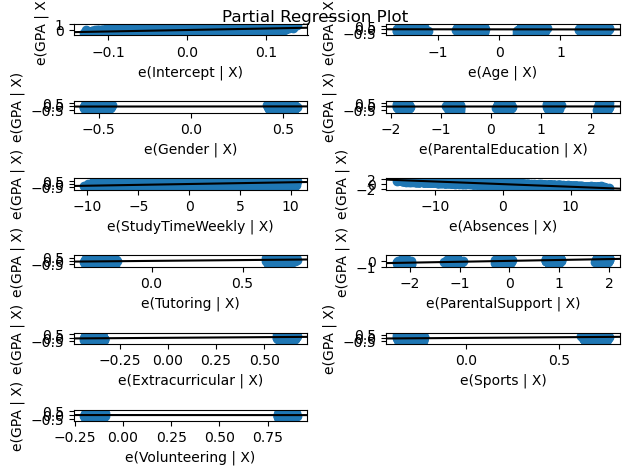

In [233]:
#Q.12
sm.graphics.plot_partregress_grid(result3)

In [ ]:
# It seems there is little problem with the data even though the leverage point is small 1980.

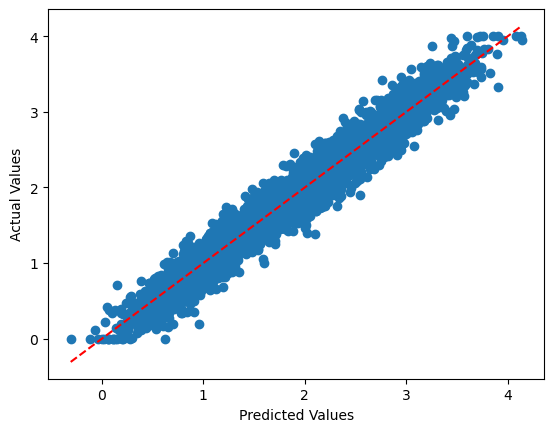

In [207]:
#Q.13
#Create a scatterplot of Y vs Y-Hat.  Include a trendline.

plt.scatter(y_hat, df['GPA'])
plt.plot([min(y_hat), max(y_hat)], [min(y_hat), max(y_hat)], color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


In [ ]:
#If the points are tightly clustered around the red dashed line, 
#it indicates that the model's predictions are accurate and closely match the actual GPA values
#A closer clustering of points to the red dashed line indicates better model accuracy

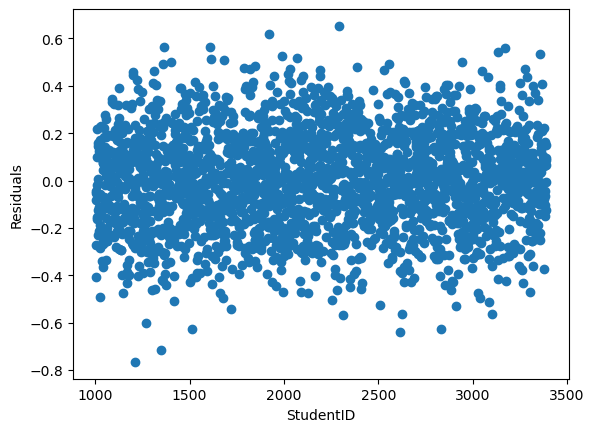

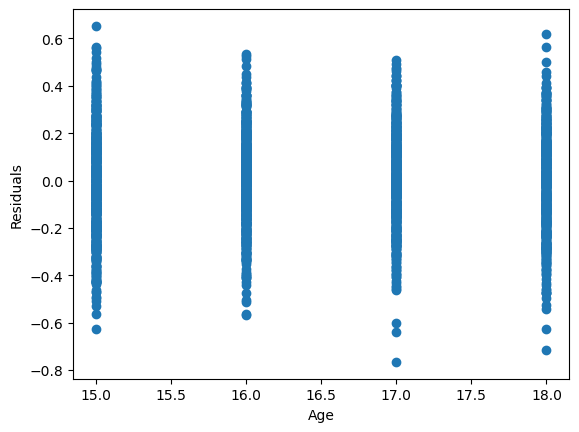

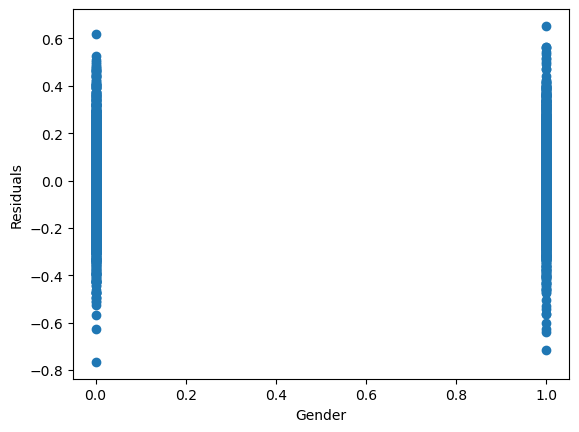

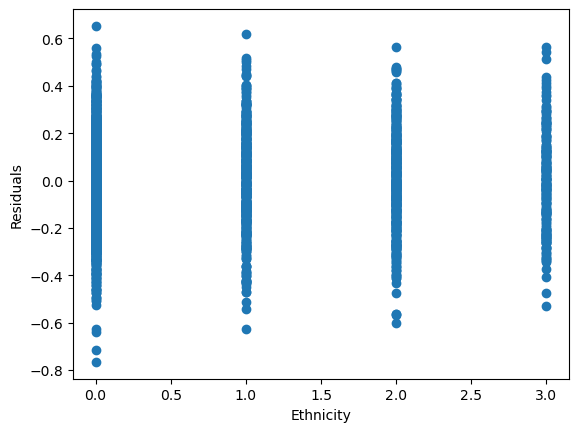

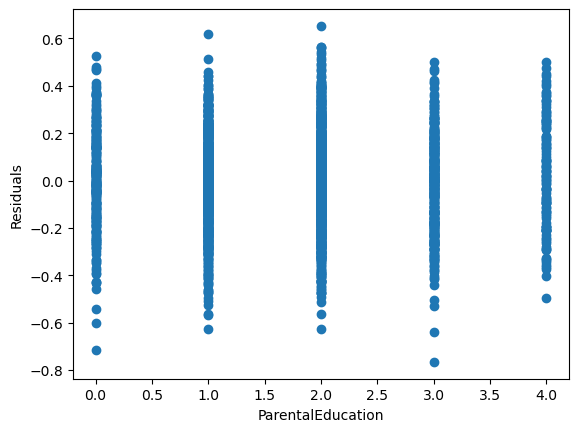

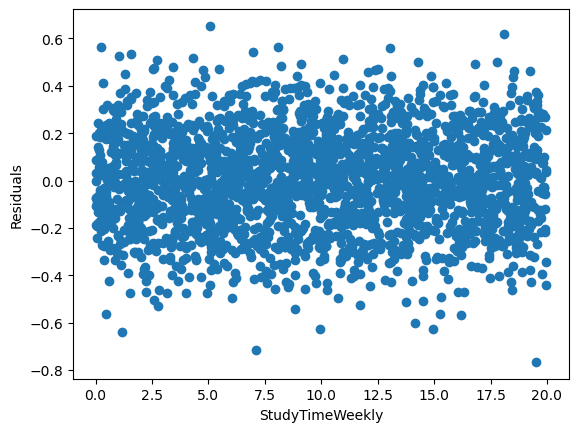

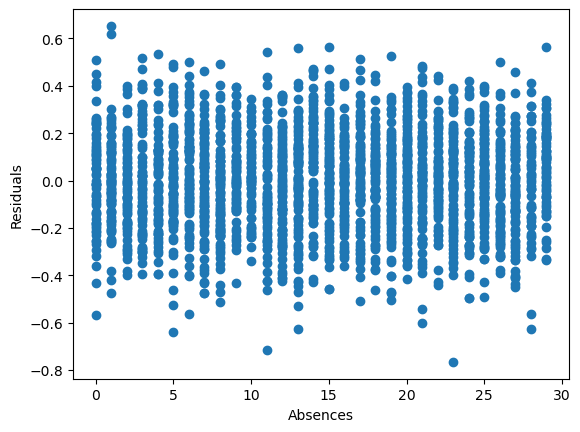

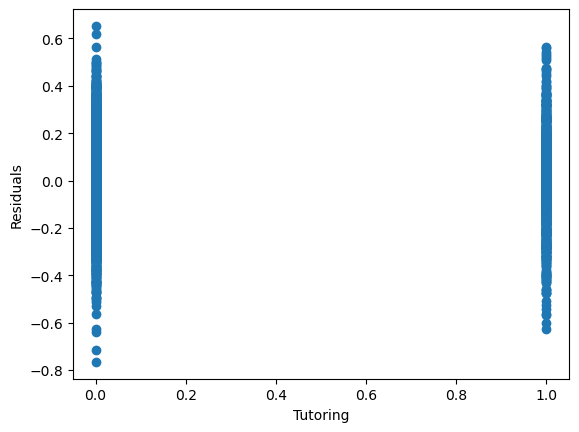

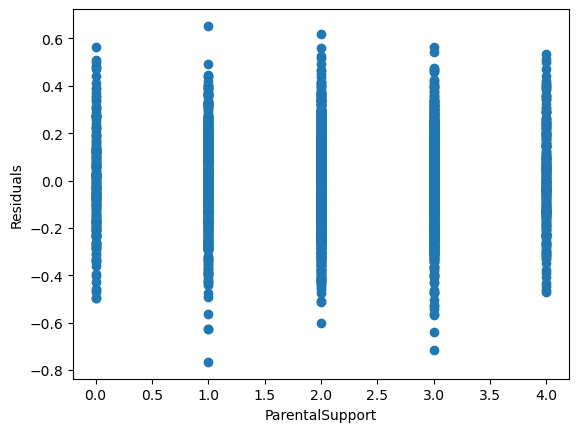

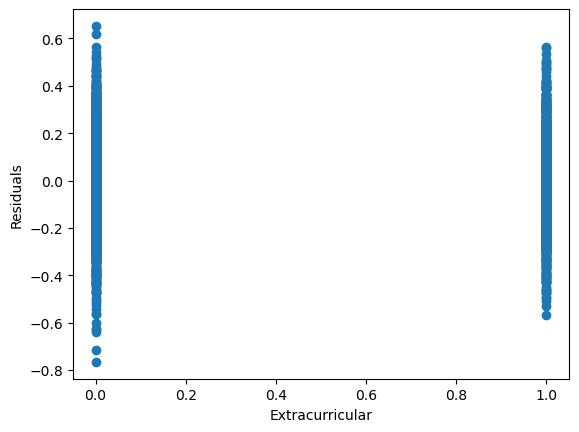

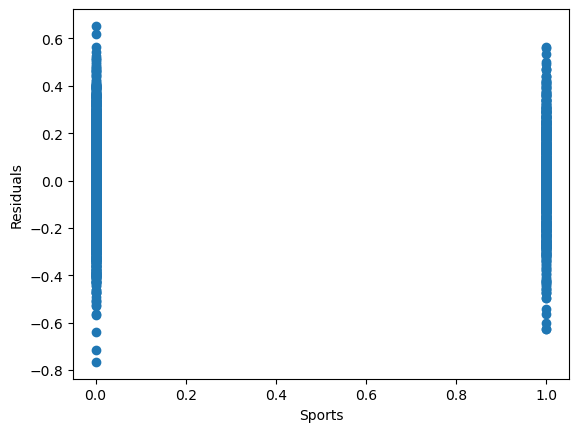

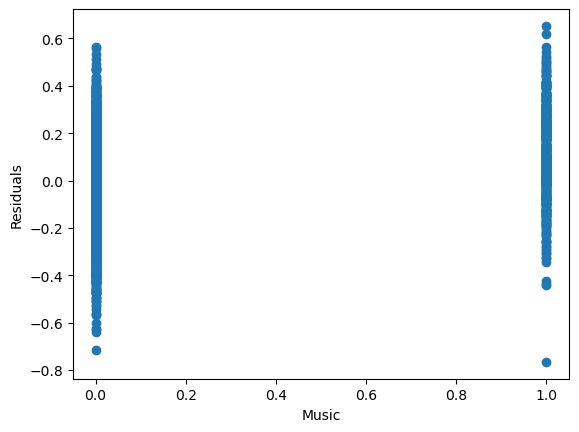

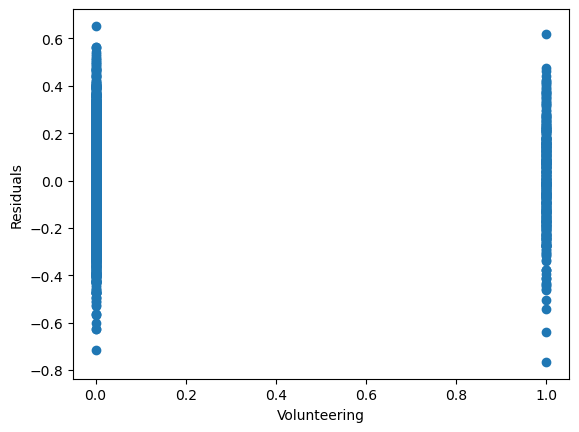

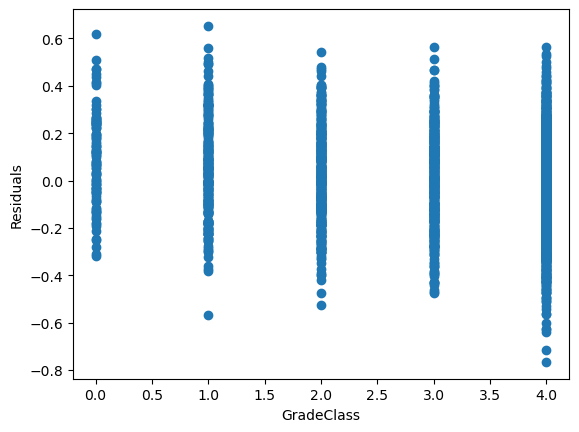

In [234]:
#Q.14
#Create a loop that loops through your x-variables and plots them against your residuals.  Display the plots. 
#Tell me if you see any problematic patterns.

for var in independent_var:
    plt.scatter(df[var], e)
    plt.xlabel(var)
    plt.ylabel("Residuals")
    plt.show()


In [247]:
#Q.15
#Create a new dataframe with five hypothetical observations’ worth of x-values 
#and use the predict function to calculate the estimated y values for each set of x values.

hypothetical_data = pd.DataFrame({
                         'Tutoring': [0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
                         'Extracurricular': [1, 0, 1, 0, 0, 1, 1, 2, 3, 0],
                         'ParentalEducation': [2, 4, 1, 3, 2, 1, 5, 1, 3, 3],
                         'StudyTimeWeekly': [10, 18, 9, 11, 20, 14, 7, 13, 18, 3],
                         'Absences': [12, 18, 1, 2, 0, 9, 5, 25, 0, 16]
                    })

hypothetical_data["ESTIMATED_GPA"] = result2.predict(hypothetical_data)
hypothetical_data



,Tutoring,Extracurricular,ParentalEducation,StudyTimeWeekly,Absences,ESTIMATED_GPA
0,0,1,2,10,12,2.204492
1,1,0,4,18,18,1.916850
2,0,1,1,9,1,3.266000
3,1,0,3,11,2,3.293941
4,1,0,2,20,0,3.763248
5,1,1,1,14,9,2.871409
6,0,1,5,7,5,2.812654
7,0,2,1,13,25,1.186990
8,1,3,3,18,0,4.257547
9,1,0,3,3,16,1.661570


In [ ]:
#From the pridicted result it is clear that these independent variable is higly influence in variation of GPA,
#that can be explained by this  Tutoring, Extracurricular, ParentalEducation, StudyTimeWeekly and Absence